In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
np.set_printoptions(precision=3 , suppress= True)

Code execution:

In [2]:
print('I love TRR181')

I love TRR181


#### Text (Markdown)

IPython [website](http://ipython.org/).

List:

* [Python on Codeacademy](http://www.codecademy.com/tracks/python)
* [Google's Python Class](https://developers.google.com/edu/python/)

Code:

    print('hello world')


#### $\LaTeX$ equations

$$\int_0^\infty e^{-x^2} dx=\frac{\sqrt{\pi}}{2}$$
$$
F(x,y)=0 ~~\mbox{and}~~
\left| \begin{array}{ccc}
  F''_{xx} & F''_{xy} &  F'_x \\
  F''_{yx} & F''_{yy} &  F'_y \\
  F'_x     & F'_y     & 0 
  \end{array}\right| = 0
$$

#### Plots

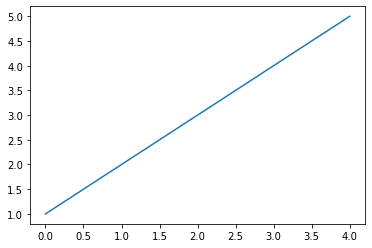

In [3]:
x = [1,2,3,4,5]
plt.plot(x);

### You can acces Operating System:

In [4]:
!ls

Ham_3column.txt      data_analysis.ipynb  ~$koldunov.pptx
MESH_cache           koldunov.pptx
R4.2.png             temp_only_values.csv


### Or execute code in other languages

In [5]:
%%perl

$variable = 1;
print "The variable has the value of $variable\n";

The variable has the value of 1


# Simple arrays

- You usually will start with some data on the disk in some format, that you would want to analyse.
- Most ot the time you want to put the data in array structure (it is true for Matlab, R, Julia and Python).
- Package, that is responsible for operations on arrays in python is numpy


In [6]:
import numpy as np

In [7]:
temp = np.loadtxt('Ham_3column.txt')

In [8]:
temp

array([[1891.,    1.,    1.,  -72.],
       [1891.,    1.,    2.,  -43.],
       [1891.,    1.,    3.,  -32.],
       ...,
       [2014.,    8.,   29.,  216.],
       [2014.,    8.,   30.,  198.],
       [2014.,    8.,   31.,  184.]])

In [9]:
only_temperature = temp[:,3]

In [10]:
only_temperature

array([-72., -43., -32., ..., 216., 198., 184.])

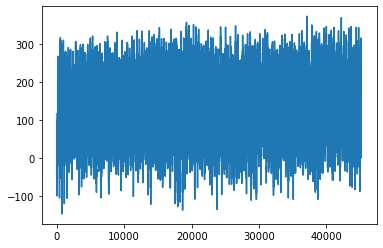

In [11]:
plt.plot(only_temperature)

In [12]:
only_tempetature_corrected = only_temperature/10
only_tempetature_corrected

array([-7.2, -4.3, -3.2, ..., 21.6, 19.8, 18.4])

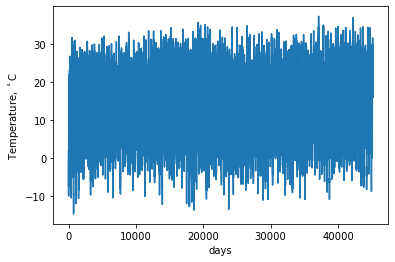

In [13]:
plt.plot(only_tempetature_corrected)
plt.xlabel('days')
plt.ylabel(r'Temperature, $^\circ$C');

In [14]:
np.savetxt('temp_only_values.csv',only_tempetature_corrected, fmt='%.4f')

### Tables

In [15]:
import pandas as pd

In [16]:
ds = pd.read_csv('./Ham_3column.txt', delimiter=r"\s+", parse_dates=[[0,1,2]], header=None)

In [17]:
ds

0_1_2    3
0     1891-01-01  -72
1     1891-01-02  -43
2     1891-01-03  -32
3     1891-01-04   12
4     1891-01-05  -29
...          ...  ...
45163 2014-08-27  219
45164 2014-08-28  234
45165 2014-08-29  216
45166 2014-08-30  198
45167 2014-08-31  184

[45168 rows x 2 columns]

In [18]:
ds.columns = ['time', 'Temp']
ds = ds.set_index(['time'])

In [19]:
ds

Temp
time            
1891-01-01   -72
1891-01-02   -43
1891-01-03   -32
1891-01-04    12
1891-01-05   -29
...          ...
2014-08-27   219
2014-08-28   234
2014-08-29   216
2014-08-30   198
2014-08-31   184

[45168 rows x 1 columns]

<AxesSubplot:xlabel='time'>

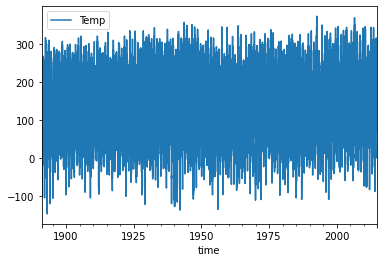

In [20]:
ds.plot()

In [21]:
ds['Temp'] = ds['Temp']/10

<AxesSubplot:xlabel='time'>

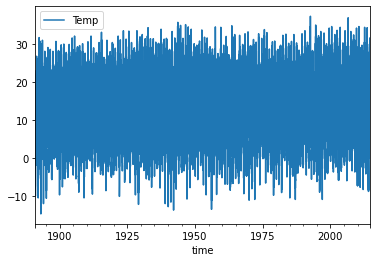

In [22]:
ds.plot()

<AxesSubplot:xlabel='time'>

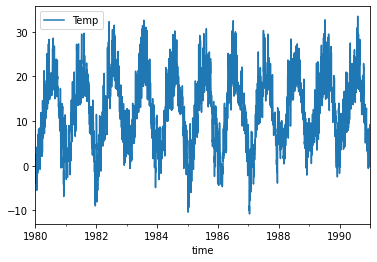

In [23]:
ds['1980':'1990'].plot()

<AxesSubplot:xlabel='time'>

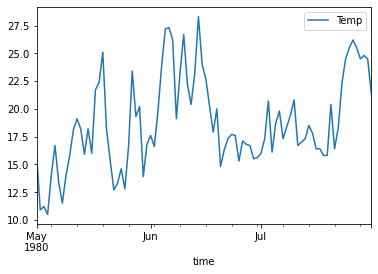

In [24]:
ds['1980-05':'1980-07'].plot()

<AxesSubplot:xlabel='time'>

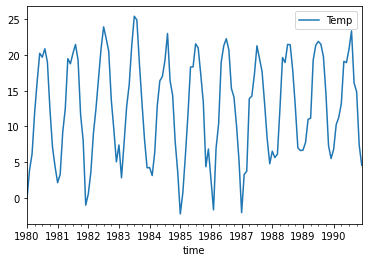

In [25]:
ds['1980':'1990'].resample("M").mean().plot()

In [26]:
ds['mon'] = ds.index.month

In [27]:
ds

Temp  mon
time                 
1891-01-01  -7.2    1
1891-01-02  -4.3    1
1891-01-03  -3.2    1
1891-01-04   1.2    1
1891-01-05  -2.9    1
...          ...  ...
2014-08-27  21.9    8
2014-08-28  23.4    8
2014-08-29  21.6    8
2014-08-30  19.8    8
2014-08-31  18.4    8

[45168 rows x 2 columns]

In [28]:
monmean = ds['1980':'1990'].groupby('mon').aggregate(np.mean)

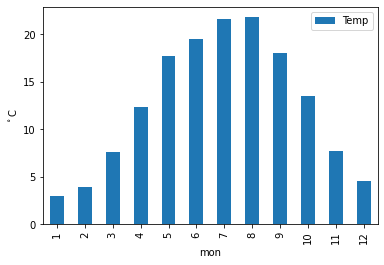

In [29]:
monmean.plot(kind='bar', ylabel=r'$^\circ$C');

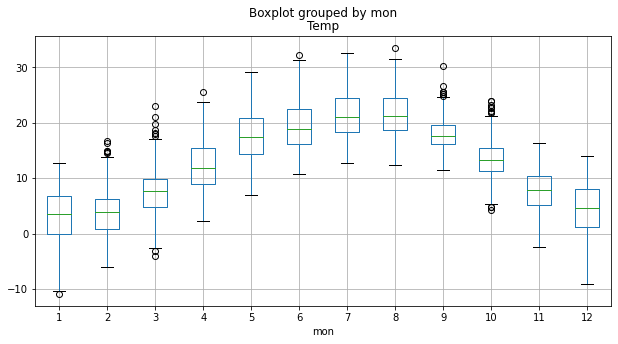

In [30]:
ds['1980':'1990'].boxplot(column=['Temp'], by='mon', figsize=(10,5));

In [31]:
del ds['mon']

## Labeled multidimensional arrays

In [32]:
import xarray as xr

In [37]:
wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/air.2m.gauss.2013.nc

#Alternative for the times of US goverment shutdowns:
#!wget http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis/surface/air.sig995.2012.nc

In [38]:
data = xr.open_dataset('./air.2m.gauss.2013.nc')

In [39]:
data

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 365)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2013)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 2012/12 by Hoop (netCDF2.3)\nConverted to chunked...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

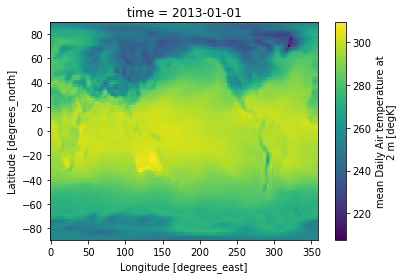

In [40]:
data.air[0,:,:].plot()

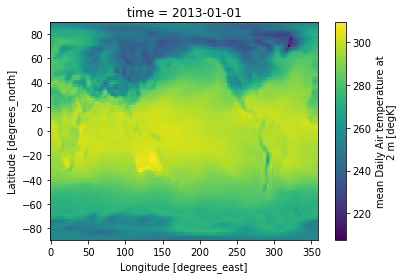

In [41]:
data.air.isel(time=0).plot()

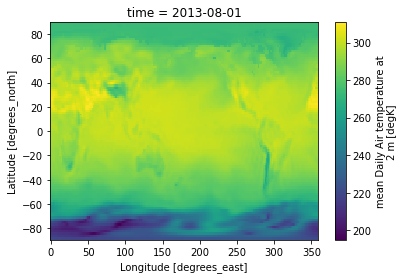

In [42]:
data.air.sel(time='2013-08-01').plot()

In [43]:
import cartopy.crs as ccrs

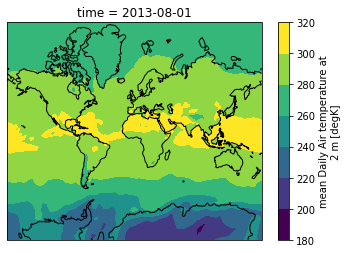

In [44]:
ax = plt.axes(projection=ccrs.Mercator())
data.air.sel(time='2013-08-01').plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

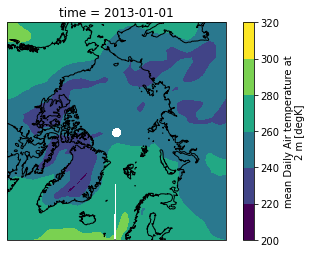

In [45]:
ax = plt.axes(projection=ccrs.NorthPolarStereo())
data.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())

In [46]:
temperature_mean = data.air.mean(dim='time')
temperature_mean

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[256.345, 256.336, 256.331, ..., 256.378, 256.366, 256.356],
       [255.725, 255.783, 255.84 , ..., 255.597, 255.634, 255.676],
       [256.217, 256.474, 256.721, ..., 255.522, 255.743, 255.977],
       ...,
       [229.466, 229.509, 229.587, ..., 229.803, 229.616, 229.505],
       [229.297, 229.172, 229.071, ..., 229.91 , 229.681, 229.474],
       [229.2  , 229.036, 228.862, ..., 229.65 , 229.503, 229.354]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [47]:
temperature_mean_C = temperature_mean-273.15
temperature_mean_C

<xarray.DataArray 'air' (lat: 94, lon: 192)>
array([[-16.805, -16.814, -16.819, ..., -16.772, -16.784, -16.794],
       [-17.425, -17.367, -17.31 , ..., -17.553, -17.516, -17.474],
       [-16.933, -16.676, -16.429, ..., -17.628, -17.407, -17.173],
       ...,
       [-43.684, -43.641, -43.563, ..., -43.347, -43.534, -43.645],
       [-43.853, -43.978, -44.079, ..., -43.24 , -43.469, -43.676],
       [-43.95 , -44.114, -44.288, ..., -43.5  , -43.647, -43.796]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1

In [48]:
import matplotlib.cm as cm

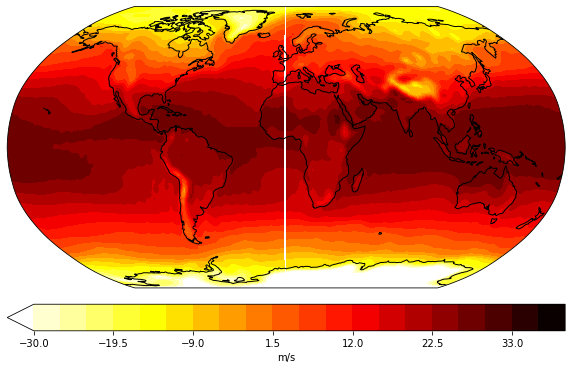

In [49]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())
temperature_mean_C.plot.contourf(ax=ax, 
                            transform=ccrs.PlateCarree(),
                            cbar_kwargs={'orientation':'horizontal', 'pad':0.03, 'label':'m/s'},
                            levels = np.linspace(-30,40,21),
                            cmap = cm.hot_r
                            )
ax.coastlines()

In [50]:
data

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 365)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Data variables:
    air      (time, lat, lon) float32 257.5 257.5 257.5 ... 255.0 255.0 255.0
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2013)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 2012/12 by Hoop (netCDF2.3)\nConverted to chunked...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

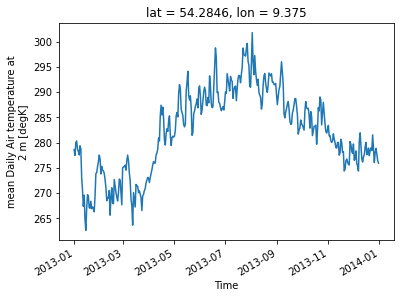

In [51]:
air_model = data.air.sel(lon=8.583333, lat=53.55, method='nearest', tolerance=5)
air_model.plot()

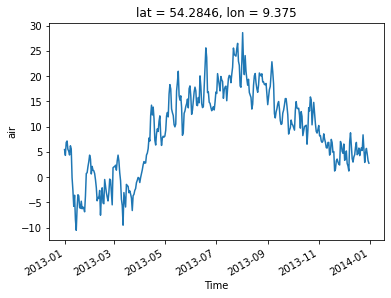

In [52]:
air_model_c = air_model - 273.15
air_model_c.plot()

<AxesSubplot:xlabel='time'>

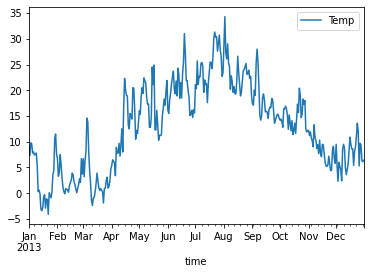

In [53]:
ds['2013':'2013'].plot()

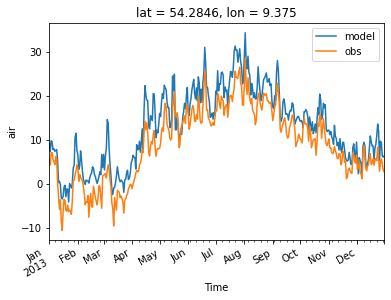

In [54]:
ds['2013':'2013'].plot()
air_model_c.plot()
plt.legend(['model', 'obs'])

In [55]:
(ds['2013':'2013'].to_xarray()-air_model_c)

<xarray.Dataset>
Dimensions:  (time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
    lat      float32 54.28
    lon      float32 9.375
Data variables:
    Temp     (time) float64 3.85 3.0 2.95 2.45 2.3 ... 4.88 3.72 1.75 2.85 3.65

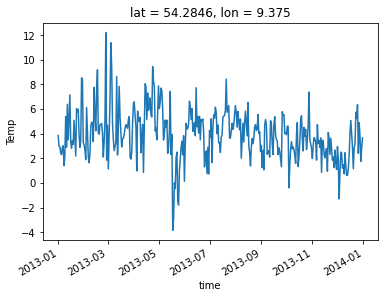

In [56]:
(ds['2013':'2013'].to_xarray()-air_model_c).Temp.plot()

## Biggish data

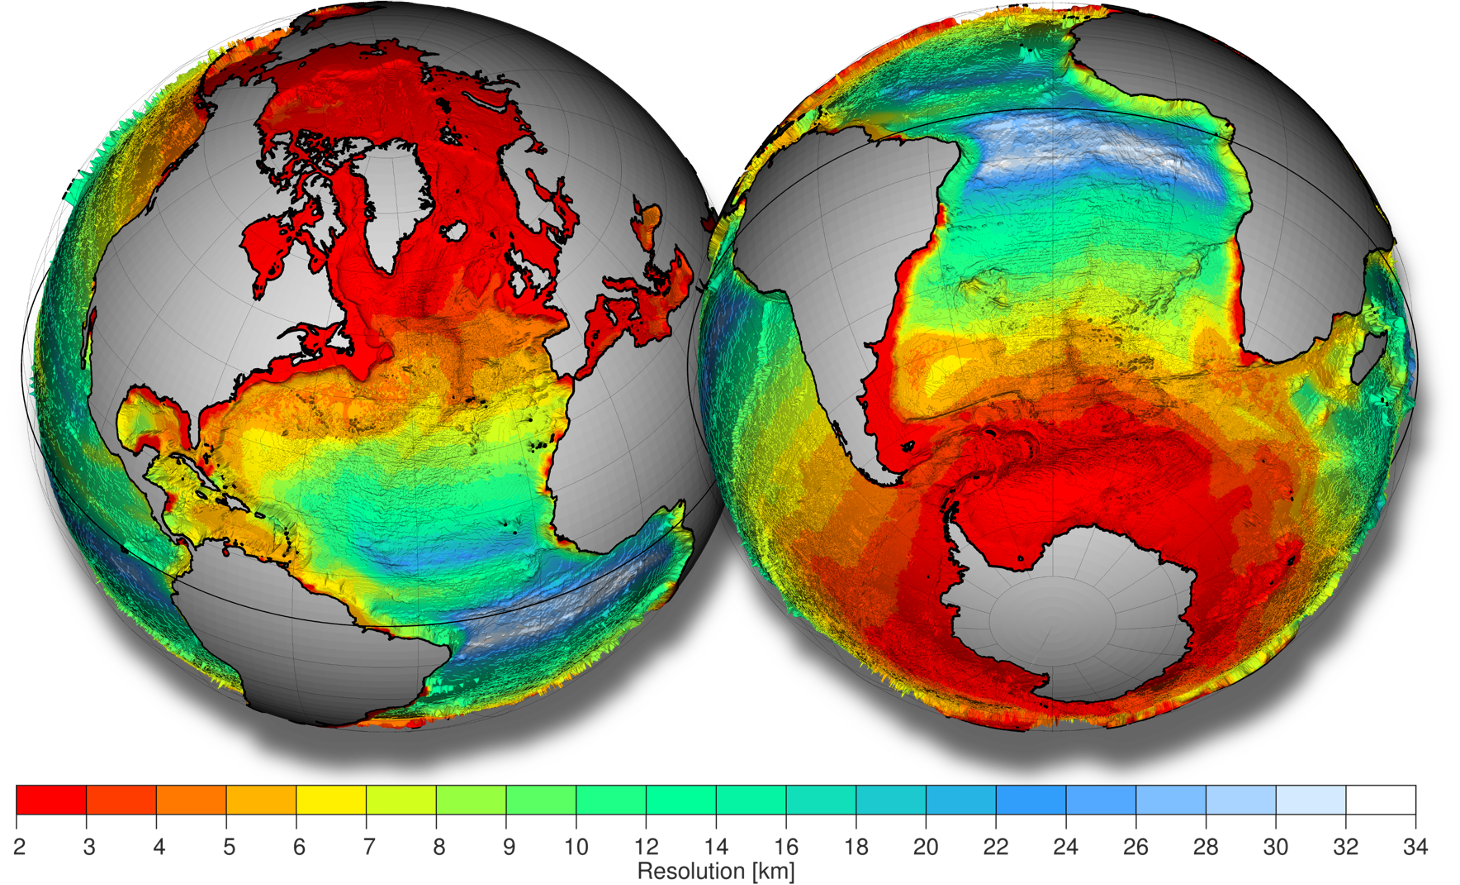

In [57]:
from IPython import display
display.Image('./R4.2.png', width=800)

### Serial processing

In [46]:
rossby = xr.open_dataarray('../../../PYTHON/DATA/R4.2_data/temp.fesom.1948.nc')
rossby

<xarray.DataArray 'temp' (time: 1, nod2: 23243988, nz1: 79)>
[1836275052 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2, nz1
Attributes:
    description:  temperature
    units:        C

In [47]:
%%time
rossby_mean = rossby.mean(dim='nz1')
rossby_mean

CPU times: user 32.2 s, sys: 14.8 s, total: 47.1 s
Wall time: 51.9 s


<xarray.DataArray 'temp' (time: 1, nod2: 23243988)>
array([[-0.023, -0.303, -0.252, ..., -0.59 , -0.349, -0.347]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2

### Parallel processing

In [48]:
from dask.distributed import Client

client=Client(n_workers=4, threads_per_worker=1)
client

<Client: 'tcp://127.0.0.1:64356' processes=4 threads=4, memory=34.36 GB>

In [49]:
rossby_parallel  = xr.open_dataarray('../../../PYTHON/DATA/R4.2_data/temp.fesom.1948.nc', chunks={'nod2':500000})
rossby_parallel

<xarray.DataArray 'temp' (time: 1, nod2: 23243988, nz1: 79)>
dask.array<open_dataset-7dafa841aa4dd5c18667884ddff6c3e0temp, shape=(1, 23243988, 79), dtype=float32, chunksize=(1, 500000, 79), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2, nz1
Attributes:
    description:  temperature
    units:        C

In [50]:
%%time
rossby_parallel_mean = rossby_parallel.mean(dim='nz1')
rossby_parallel_mean

CPU times: user 3.01 ms, sys: 302 µs, total: 3.32 ms
Wall time: 3.42 ms


<xarray.DataArray 'temp' (time: 1, nod2: 23243988)>
dask.array<mean_agg-aggregate, shape=(1, 23243988), dtype=float32, chunksize=(1, 500000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2

In [51]:
%%time
rossby_parallel_mean.compute()
rossby_parallel_mean

CPU times: user 5.69 s, sys: 483 ms, total: 6.17 s
Wall time: 19.6 s


<xarray.DataArray 'temp' (time: 1, nod2: 23243988)>
dask.array<mean_agg-aggregate, shape=(1, 23243988), dtype=float32, chunksize=(1, 500000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01
Dimensions without coordinates: nod2

In [11]:
import dask.array as da

x = da.random.random((1000, 1000), chunks='16MiB')
x

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [12]:
y = (x+x.T) - x.mean(axis=1)
y.sum().compute()

499781.6988352481

distributed.nanny - WARNING - Restarting worker


## Interactive visualization

/Users/nkolduno/miniconda3/envs/pf22/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
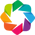

In [52]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import geoviews as gv
import holoviews as hv
from holoviews.operation.datashader import datashade, shade, dynspread, rasterize
import pyfesom2 as pf
import xarray as xr
import pandas as pd
from matplotlib import cm
import numpy as np
gv.extension('bokeh')

In [53]:
mesh = pf.load_mesh('../../../PYTHON/DATA/R4.2_mesh/')

/Users/nkolduno/PYTHON/DATA/R4.2_mesh/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/R4.2_mesh/pickle_mesh_py3_fesom2


In [54]:
mesh


FESOM mesh:
path                  = /Users/nkolduno/PYTHON/DATA/R4.2_mesh
alpha, beta, gamma    = 0, 0, 0
number of 2d nodes    = 23243988
number of 2d elements = 46260680

        

## Screen resolutions

    HD: 1920 x 1080 = 2073600
    4K: 3840 x 2160 = 8294400

In [55]:
u = xr.open_dataarray('../../../PYTHON/DATA/R4.2_data/unod_sample.nc')
v = xr.open_dataarray('../../../PYTHON/DATA/R4.2_data/vnod_sample.nc')
speed = np.hypot(u, v).astype('float32')

In [56]:
speed

<xarray.DataArray 'unod' (nod2: 23243988)>
array([0.   , 0.114, 0.117, ..., 0.243, 0.227, 0.254], dtype=float32)
Coordinates:
    time     datetime64[ns] 2009-01-31T23:57:00
Dimensions without coordinates: nod2
Attributes:
    description:  horizontal velocity at nodes
    units:        m/s

In [57]:
elem2 = mesh.elem[mesh.no_cyclic_elem]


verts = pd.DataFrame({'Longitudes':mesh.x2, 'Latitudes':mesh.y2, 'data':np.log10(speed)})

tris = pd.DataFrame({'v0':elem2[:,0],'v1':elem2[:,1], 'v2':elem2[:,2]})

fesom_mesh = gv.TriMesh((tris, verts), crs=crs.Mercator())

projection=crs.Mercator()
width=800,
height=600,
y_range=(-80,90)

/Users/nkolduno/miniconda3/envs/pf22/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [58]:
main_plot = rasterize(fesom_mesh, interpolation=None, ).opts(
                    tools=["hover"],
                    width=width[0],
                    height=height[0],
                      projection=projection,
                    colorbar=True,
                    cmap=cm.bone,
                    colorbar_position="bottom",
#                     clabel=clabel,
                    fontscale=1.3,
#                     color_levels=list(np.linspace(-8e-5, 8e-5, 41)),
#                    clim = (1e-5, 1e-4),
    clim = (-2, 1),
#     cnorm='eq_hist',
    xlim=(-180, 180),
    ylim=(-80, 90)
                )
main_plot * gv.feature.coastline()

:DynamicMap   []
   :Overlay
      .Image.I     :Image   [Longitudes,Latitudes]   (Longitudes_Latitudes data)
      .Coastline.I :Feature   [Longitude,Latitude]